In [ ]:
import os
print(os.getcwd())

In [1]:
#list all files in the directory
import pandas as pd
df = pd.read_csv('../datasets/kaggle_cleaned/flights_w_weather_raw.csv')


In [ ]:
#do feature analysis on df
df.info()
df.describe()
df.head()

<Axes: ylabel='Frequency'>

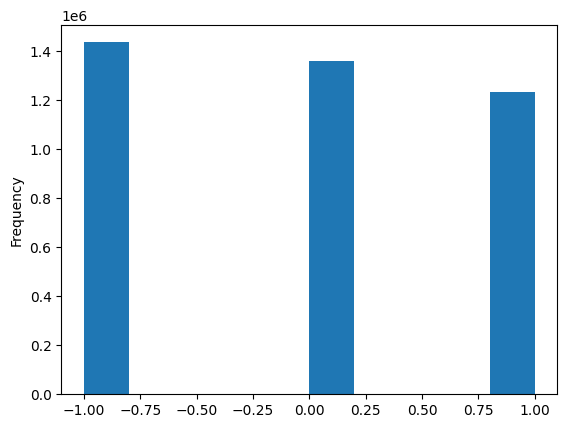

In [2]:
#convert continous column 'ARRIVAL_DELAY' to categorical column 'ARRIVAL_DELAY_CAT'
def convert_to_cat(x, threshold=10, offset=5):
    if x <= threshold + offset and x >= -threshold + offset:
        return 0
    elif x < offset:
        return -1
    else:
        return 1

std = df['ARRIVAL_DELAY'].std()/3
std =5
# std = 0
percentile = 0.10
mean = df['ARRIVAL_DELAY'].mean()-3
mean = -5
#threshold data within +/- 10% of the mean
df['ARRIVAL_DELAY_CAT'] = df['ARRIVAL_DELAY'].apply(convert_to_cat, threshold=std, offset=mean)
#plot the distribution of the categorical data
df['ARRIVAL_DELAY_CAT'].plot(kind='hist',bins=10)


In [ ]:
print(f'std: {std}, mean: {mean}')

In [5]:

#loop through the features, in a nested loop, only compare 5 features at a time
#select 5 features at a time
import itertools
import os, random

from yellowbrick.features import Rank2D, RadViz, ParallelCoordinates, JointPlotVisualizer, PCADecomposition, Manifold


def visualize_features(df, features, target, outdir):
    """
    Visualize the features in the dataframe using various Yellowbrick visualizers.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the features and target variable.
    features : list
        The list of features to visualize.
    target : str
        The name of the target variable.
    outdir : str
        The output directory to save the visualizations.
    """

    #split data to only randomly keep 10% of the data
    # df = df.sample(frac=0.5, random_state=1)
    #convert features to categorical if non-numeric
    for col in df.columns:
        if col in features:
            if df[col].dtype != 'int64' and df[col].dtype != 'float64':
                df[col] = df[col].astype('category')
                df[col] = df[col].cat.codes


    feature_combinations = []
    # I want 20 combinations of 10 features, random, no repeats or targets
    for i in range(30):
        comb = []
        while len(comb) < 5:
            index = random.randint(0, len(features)-1)
            if features[index] not in comb and features[index] != target:
                comb.append(features[index])
        feature_combinations.append(comb)

    
    #if duplicate combinations, remove them
    feature_combinations = list(set(tuple(sorted(sub)) for sub in feature_combinations))

    #make the indexing for tmp_df and df the same
    df = df.reset_index(drop=True)    

    size= (4000,4000)

    # Loop through each unique set of 5 features
    # for idx, comb in enumerate(feature_combinations):
        # print(f"Visualizing feature combination {idx+1}: {comb}")
        


        #make tmp df that only keeps columns in comb
        # tmp_df = pd.DataFrame()
        # for col in df.columns:
        #     if col in comb:
        #         tmp_df[col] = df[col]

        # tmp_df[target] = df[target]

    idx = 0
    tmp_df=df[features]
    comb = features
    # Instantiate the visualizer with the Covariance ranking algorithm
    visualizer = Rank2D(features=comb, algorithm='covariance', size=size)

    
    visualizer.fit(tmp_df, df[target])
    visualizer.transform(tmp_df)
    #make the size 3x4 3000x4000
    visualizer.poof(outpath=os.path.join(outdir, f"rank2d_covariance_{idx+1}.png"))

    # Instantiate the visualizer with the Pearson ranking algorithm
    visualizer = Rank2D(features=comb, algorithm='pearson', size=size)

    visualizer.fit(tmp_df, df[target])
    visualizer.transform(tmp_df)
    visualizer.poof(outpath=os.path.join(outdir, f"rank2d_pearson_{idx+1}.png"))

    # Instantiate the visualizer with the Spearman ranking algorithm
    visualizer = Rank2D(features=comb, algorithm='spearman', size=size)

    visualizer.fit(tmp_df,df[target])
    visualizer.transform(tmp_df)
    visualizer.poof(outpath=os.path.join(outdir, f"rank2d_spearman_{idx+1}.png"))

    # Instantiate the visualizer with the Kendall Tau ranking algorithm
    visualizer = Rank2D(features=comb, algorithm='kendalltau', size=size)

    visualizer.fit(tmp_df, df[target])
    visualizer.transform(tmp_df)
    visualizer.poof(outpath=os.path.join(outdir, f"rank2d_kendalltau_{idx+1}.png"))

    # Instantiate the visualizer with the RadViz algorithm
    visualizer = RadViz(classes=[-1, 0, 1], size=size)

    visualizer.fit(tmp_df, df[target])
    visualizer.transform(tmp_df)
    visualizer.poof(outpath=os.path.join(outdir, f"radviz_{idx+1}.png"))

    # Instantiate the visualizer with the Parallel Coordinates algorithm
    visualizer = ParallelCoordinates(classes=[-1, 0, 1], size=size)

    visualizer.fit(tmp_df, df[target])
    visualizer.transform(tmp_df, df[target])
    visualizer.poof(outpath=os.path.join(outdir, f"parallel_coordinates_{idx+1}.png"))

    # Instantiate the visualizer with the Joint Plot algorithm
    # visualizer = JointPlotVisualizer(feature=comb[0], target=target)

    # visualizer.fit(tmp_df
    # visualizer.transform(tmp_df[comb[0]])
    # visualizer.poof(outpath=os.path.join(outdir, f"jointplot_{idx+1}.png"))

    # Instantiate the visualizer with the PCA algorithm
    visualizer = PCADecomposition(scale=True, proj_features=True, color=target, size=size)

    visualizer.fit(tmp_df, df[target])
    visualizer.transform(tmp_df, df[target])
    visualizer.poof(outpath=os.path.join(outdir, f"pca_{idx+1}.png"))

    # Instantiate the visualizer with the Manifold algorithm
    visualizer = Manifold(manifold='tsne', target=target, size=size)

    visualizer.fit_transform(tmp_df, df[target])
    visualizer.poof(outpath=os.path.join(outdir, f"manifold_{idx+1}.png"))



        # tmp_df[target] = df[target]

        # # Instantiate the visualizer with the Covariance ranking algorithm
        # visualizer = Rank2D(features=comb, algorithm='covariance', size=size)
    
        
        # visualizer.fit(tmp_df, df[target])
        # visualizer.transform(tmp_df)
        # #make the size 3x4 3000x4000
        # visualizer.poof(outpath=os.path.join(outdir, f"rank2d_covariance_{idx+1}.png"))

        # # Instantiate the visualizer with the Pearson ranking algorithm
        # visualizer = Rank2D(features=comb, algorithm='pearson', size=size)

        # visualizer.fit(tmp_df, df[target])
        # visualizer.transform(tmp_df)
        # visualizer.poof(outpath=os.path.join(outdir, f"rank2d_pearson_{idx+1}.png"))

        # # Instantiate the visualizer with the Spearman ranking algorithm
        # visualizer = Rank2D(features=comb, algorithm='spearman', size=size)

        # visualizer.fit(tmp_df,df[target])
        # visualizer.transform(tmp_df)
        # visualizer.poof(outpath=os.path.join(outdir, f"rank2d_spearman_{idx+1}.png"))

        # # Instantiate the visualizer with the Kendall Tau ranking algorithm
        # visualizer = Rank2D(features=comb, algorithm='kendalltau', size=size)

        # visualizer.fit(tmp_df, df[target])
        # visualizer.transform(tmp_df)
        # visualizer.poof(outpath=os.path.join(outdir, f"rank2d_kendalltau_{idx+1}.png"))

        # # Instantiate the visualizer with the RadViz algorithm
        # visualizer = RadViz(classes=[-1, 0, 1], size=size)

        # visualizer.fit(tmp_df, df[target])
        # visualizer.transform(tmp_df)
        # visualizer.poof(outpath=os.path.join(outdir, f"radviz_{idx+1}.png"))

        # Instantiate the visualizer with the Parallel Coordinates algorithm
        # visualizer = ParallelCoordinates(classes=[-1, 0, 1], size=size)

        # visualizer.fit(tmp_df, df[target])
        # visualizer.transform(tmp_df, df[target])
        # visualizer.poof(outpath=os.path.join(outdir, f"parallel_coordinates_{idx+1}.png"))

        # # Instantiate the visualizer with the Joint Plot algorithm
        # # visualizer = JointPlotVisualizer(feature=comb[0], target=target)

        # # visualizer.fit(tmp_df
        # # visualizer.transform(tmp_df[comb[0]])
        # # visualizer.poof(outpath=os.path.join(outdir, f"jointplot_{idx+1}.png"))

        # # Instantiate the visualizer with the PCA algorithm
        # visualizer = PCADecomposition(scale=True, proj_features=True, color=target, size=size)

        # visualizer.fit(tmp_df, df[target])
        # visualizer.transform(tmp_df, df[target])
        # visualizer.poof(outpath=os.path.join(outdir, f"pca_{idx+1}.png"))

        # # Instantiate the visualizer with the Manifold algorithm
        # visualizer = Manifold(manifold='tsne', target=target, size=size)

        # visualizer.fit_transform(tmp_df, df[target])
        # visualizer.poof(outpath=os.path.join(outdir, f"manifold_{idx+1}.png"))
        
# Feature Analysis
# Create a list of the feature names
exclude = ['ARRIVAL_DELAY', 'ARRIVAL_DELAY_CAT', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ts_sch_dep', 'ts_sch_dep.1', 'ts_sch_arrival','ts_sch_arrival.1', 'o_expire_time_gmt', 'd_expire_time_gmt', 'o_valid_time_gmt', 'd_valid_time_gmt', 'remove1', 'remove2']
# features = [col for col in df.columns if col not in exclude]
tmp_df = pd.DataFrame()
for col in df.columns:
    if col not in exclude:
        tmp_df[col] = df[col]

tmp_df['ARRIVAL_DELAY_CAT'] = df['ARRIVAL_DELAY_CAT']
features = tmp_df.columns
#remove the target variable
features = features.drop('ARRIVAL_DELAY_CAT')


target_df = 'ARRIVAL_DELAY_CAT'

#if directory does not exist, create it
if not os.path.exists('yellowbrick'):
    os.makedirs('yellowbrick')


visualize_features(tmp_df, features, target_df, 'yellowbrick')


c:\Users\tccox\Documents\OMSCS\CSE6242\flight-delay-prediction\env\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [ ]:
#print columns of the dataframe
df.columns

In [ ]:
#check for null values
df.isnull().sum()

In [ ]:
#go through each column and if a 'string' column, convert to 'category' column
#if path not exist, create it
import os

from matplotlib import pyplot as plt
import seaborn as sns
if not os.path.exists('feature_analysis'):
    os.makedirs('feature_analysis')


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col].cat.codes
        #plot the bar chart
        plt.figure(figsize=(10,5))
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
        plt.title(col)
        plt.savefig('feature_analysis/'+col+'.png')
        plt.close()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from yellowbrick.features import Rank2D

# Load dataset
data = df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Select features
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)

# Visualize feature analysis
visualizer = Rank2D(features=data.columns[:-1])
visualizer.fit_transform(X_train_selected)
visualizer.show()